In [ ]:
#Capture Image To Read Area
import cv2 as cv
import numpy as np
cap = cv.VideoCapture(1)
while cv.waitKey(1) & 0xFF != ord('q'):
    ret, frame = cap.read()
    image = frame.copy()
    cv.rectangle(image, (5, 20), (635, 315), (0, 255, 0), 2)
    cv.imshow('Read Area Circle', image)

roi_cropped = frame[20:315, 5:635]
roi_width = int(roi_cropped.shape[1] * (150 / 100))
roi_height = int(roi_cropped.shape[0] * (150 / 100))
cropped = cv.resize(roi_cropped, (roi_width,roi_height), interpolation = cv.INTER_AREA)
cv.imwrite('./pic/test/area/area_5.jpg', cropped)
cap.release()
cv.destroyAllWindows()

img2 = cropped.copy()
gray = cv.cvtColor(cropped, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (7, 7), 1.5)
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1.5, 50, param1=50, param2=25, minRadius=30, maxRadius=50)
circles = np.uint16(np.around(circles))
name, none = 'X', '0'
rows, cols = 5, 11
height, width = cropped.shape[:2]
cell_height, cell_width = height // rows + 1, width // cols + 1
grid_matrix = np.full((rows, cols), none, dtype=str)

for i in circles[0, :]:
    center, radius = (i[0], i[1]), i[2]
    area_circle = np.pi * radius ** 2
    row_index, col_index = center[1] // cell_height, center[0] // cell_width
    if area_circle > 4700:
        cv.circle(img2, center, radius, (0, 255, 0), 2)
        cv.circle(img2, center, 1, (0, 0, 255), 1)
        grid_matrix[row_index, col_index] = name
        
result_list = grid_matrix.tolist()
print(result_list)
cv.imshow('Result', img2)
cv.waitKey(0)
cv.destroyAllWindows()

In [3]:
#Capture Image To Detect blocks
import json
import cv2 as cv
import numpy as np
from roboflow import Roboflow
cap = cv.VideoCapture(1)
while cv.waitKey(1) & 0xFF != ord('q'):
    ret, frame = cap.read()
    image = frame.copy()
    cv.imshow('Blocks Detection', image)

cv.imwrite('./pic/test/block/block_5.jpg', image)
cap.release()
cv.destroyAllWindows()
rf = Roboflow(api_key="mg8d8MEBGoGh7NAQG7j4")
project = rf.workspace().project("iq_puzzle")
model = project.version(4).model
json_result = model.predict('./pic/test/block/block_4.jpg', confidence=30, overlap=30).json()
str_result = json.dumps(json_result)

A_light_blue_dot = np.array([[1, 1, 0], [1, 1, 1]])
B_light_blue = np.array([[0, 1, 1, 1], [1, 1, 0, 0]])
C_orange_dot = np.array([[0, 1, 1], [1, 1, 0], [0, 1, 0]])
D_blue = np.array([[1, 1, 1, 1], [1, 0, 0, 0]])
E_blue_dot = np.array([[1, 1, 1, 1], [0, 1, 0, 0]])
F_light_green_dot = np.array([[1, 1, 0], [0, 1, 1]])
G_orange = np.array([[0, 0, 1], [0, 0, 1], [1, 1, 1]])
H_light_green = np.array([[0, 1, 0], [1, 1, 1]])
I_green = np.array([[1, 1], [0, 1]])
J_green_dot = np.array([[0, 0, 1], [1, 1, 1]])
K_yellow = np.array([[0, 0, 1], [0, 1, 1], [1, 1, 0]])
L_yellow_dot = np.array([[1, 0, 1], [1, 1, 1]])

word_matrices = {
    "A" : A_light_blue_dot,"B" : B_light_blue,"C" : C_orange_dot,"D_": D_blue,"E": E_blue_dot,"F" : F_light_green_dot,
    "G" : G_orange,"H" : H_light_green,"I": I_green,"J": J_green_dot,"K" : K_yellow,"L" : L_yellow_dot
}

word_list = ["A","B","C","D_","E","F","G","H","I","J","K","L"]
result_word = []
blocks = {}
for word in word_list:
    if word in str_result:
        blocks[word] = word_matrices[word]
        result_word.append(word)
print(blocks)

loading Roboflow workspace...
loading Roboflow project...
{'A': array([[1, 1, 0],
       [1, 1, 1]]), 'C': array([[0, 1, 1],
       [1, 1, 0],
       [0, 1, 0]]), 'E': array([[1, 1, 1, 1],
       [0, 1, 0, 0]]), 'L': array([[1, 0, 1],
       [1, 1, 1]])}


Image 1 (save_1.jpg): Mean Squared Error=6846.98, Structural Similarity Index=0.26
Image 2 (save_10.jpg): Mean Squared Error=6454.59, Structural Similarity Index=0.25
Image 3 (save_11.jpg): Mean Squared Error=6101.15, Structural Similarity Index=0.33
Image 4 (save_12.jpg): Mean Squared Error=7227.87, Structural Similarity Index=0.29
Image 5 (save_2.jpg): Mean Squared Error=6953.11, Structural Similarity Index=0.24
Image 6 (save_3.jpg): Mean Squared Error=5800.96, Structural Similarity Index=0.26
Image 7 (save_4.jpg): Mean Squared Error=5982.45, Structural Similarity Index=0.25
Image 8 (save_5.jpg): Mean Squared Error=7856.88, Structural Similarity Index=0.22
Image 9 (save_6.jpg): Mean Squared Error=6796.27, Structural Similarity Index=0.24
Image 10 (save_7.jpg): Mean Squared Error=6389.17, Structural Similarity Index=0.24
Image 11 (save_8.jpg): Mean Squared Error=5887.29, Structural Similarity Index=0.26
Image 12 (save_9.jpg): Mean Squared Error=6070.31, Structural Similarity Index=0.2

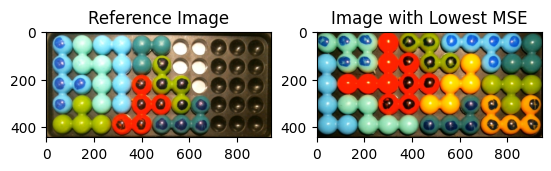

In [1]:
import os
import cv2 as cv
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np

def mse(image1, image2):
    return np.sum((image1.astype("float") - image2.astype("float")) ** 2) / float(image1.size)

def compare_images(reference_image, image_folder):
    gray_reference_image = cv.cvtColor(reference_image, cv.COLOR_BGR2GRAY)
    results = []
    min_mse_image, min_mse_value = None, float('inf')
    for index, jpeg_file in enumerate(os.listdir(image_folder), start=1):
        image_path = os.path.join(image_folder, jpeg_file)
        current_image = cv.imread(image_path)
        current_image = cv.resize(current_image, (reference_image.shape[1], reference_image.shape[0]))
        gray_image = cv.cvtColor(current_image, cv.COLOR_BGR2GRAY)
        mse_value = mse(gray_reference_image, gray_image)
        ssim_value = ssim(gray_reference_image, gray_image)
        results.append((f"Image {index} ({jpeg_file})", mse_value, ssim_value))
        if mse_value < min_mse_value:
            min_mse_value, min_mse_image = mse_value, current_image
    return results, min_mse_image

reference_image = cv.imread("./pic/test/area/area_2.jpg")
image_folder = "./pic/compare/"
common_width, common_height = reference_image.shape[1], reference_image.shape[0]
results, min_mse_image = compare_images(reference_image, image_folder)
for name, mse_value, ssim_value in results:
    print(f"{name}: Mean Squared Error={round(mse_value, 2)}, Structural Similarity Index={round(ssim_value, 2)}")

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(reference_image, cv.COLOR_BGR2RGB))
plt.title("Reference Image")
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(min_mse_image, cv.COLOR_BGR2RGB))
plt.title("Image with Lowest MSE")
plt.show()

loading Roboflow workspace...
loading Roboflow project...
[['0' '0' '0' '0' '0' '0' 'X' 'X' 'X' 'X' 'X']
 ['0' '0' '0' '0' '0' 'X' 'X' 'X' 'X' 'X' 'X']
 ['0' '0' '0' '0' '0' 'X' 'X' 'X' 'X' 'X' 'X']
 ['0' '0' '0' '0' 'X' 'X' 'X' 'X' 'X' 'X' 'X']
 ['0' '0' '0' '0' 'X' 'X' 'X' 'X' 'X' 'X' 'X']]
{'A': array([[1, 1, 1],
       [1, 1, 0]]), 'C': array([[0, 1, 0],
       [1, 1, 0],
       [0, 1, 1]]), 'E': array([[0, 1],
       [1, 1],
       [0, 1],
       [0, 1]]), 'J': array([[1, 1],
       [1, 0],
       [1, 0]]), 'L': array([[1, 1],
       [1, 0],
       [1, 1]])}


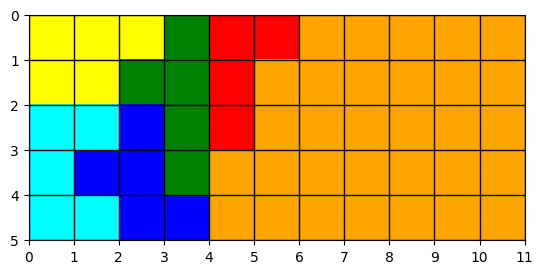

Done


In [2]:
#Solving algorithm
import os
import json
import cv2 as cv
import numpy as np
from roboflow import Roboflow
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

rf = Roboflow(api_key="mg8d8MEBGoGh7NAQG7j4")
project = rf.workspace().project("iq_puzzle")
model = project.version(4).model
json_result = model.predict("./pic/test/block/block_3.jpg", confidence=30, overlap=30).json()
str_result = json.dumps(json_result)

A_light_blue_dot = np.array([[1, 1, 1], [1, 1, 0]])
B_light_blue = np.array([[0, 1, 1, 1], [1, 1, 0, 0]])
C_orange_dot = np.array([[0, 1, 0], [1, 1, 0], [0, 1, 1]])
D_blue = np.array([[1, 1, 1, 1], [1, 0, 0, 0]])
E_blue_dot = np.array([[0, 1], [1, 1], [0, 1], [0, 1]])
F_light_green_dot = np.array([[1, 1, 0], [0, 1, 1]])
G_orange = np.array([[0, 0, 1], [0, 0, 1], [1, 1, 1]])
H_light_green = np.array([[0, 1, 0], [1, 1, 1]])
I_green = np.array([[1, 1], [0, 1]])
J_green_dot = np.array([[1,1],[1,0],[1,0]])
K_yellow = np.array([[0, 0, 1], [0, 1, 1], [1, 1, 0]])
L_yellow_dot = np.array([[1, 1],[ 1,0], [1, 1]])

word_matrices = {
    "A" : A_light_blue_dot,"B" : B_light_blue,"C" : C_orange_dot,"D_": D_blue,"E": E_blue_dot,"F" : F_light_green_dot,
    "G" : G_orange,"H" : H_light_green,"I": I_green,"J": J_green_dot,"K" : K_yellow,"L" : L_yellow_dot
}

word_list = ["A","B","C","D_","E","F","G","H","I","J","K","L"]
result_word = []
blocks = {}
for word in word_list:
    if word in str_result:
        blocks[word] = word_matrices[word]
        result_word.append(word)
check_block = len(blocks)

#Use Hough Circle Transform with Gaussian Blur
img = cv.imread('./pic/test/area/area_3.jpg')
img2 = img.copy()
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (7, 7), 1.5)
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1.5, 50, param1=50, param2=25, minRadius=30, maxRadius=50)
circles = np.uint16(np.around(circles))
name, none = 'X', '0'
rows, cols = 5, 11
height, width = img.shape[:2]
cell_height, cell_width = height // rows + 1, width // cols + 1
grid_matrix = np.full((rows, cols), none, dtype=str)

for i in circles[0, :]:
    center, radius = (i[0], i[1]), i[2]
    area_circle = np.pi * radius ** 2
    row_index, col_index = center[1] // cell_height, center[0] // cell_width
    if area_circle > 4700:
        cv.circle(img2, center, radius, (0, 255, 0), 2)
        cv.circle(img2, center, 1, (0, 0, 255), 1)
        grid_matrix[row_index, col_index] = name

result_list = grid_matrix.tolist()
area = np.array(result_list, dtype='str')
print(area)
print(blocks)
def can_place_block(block, row, col):
    block_rows, block_cols = block.shape
    return (
        row + block_rows <= area.shape[0] and
        col + block_cols <= area.shape[1] and
        not np.any(block * (area[row:row + block_rows, col:col + block_cols] != '0'))
    )

def place_block(block, row, col, block_name):
    area[row:row + block.shape[0], col:col + block.shape[1]][block == 1] = block_name

def remove_block(block, row, col):
    area[row:row + block.shape[0], col:col + block.shape[1]][block == 1] = '0'

def solve(block_names, remaining_blocks):
    if len(block_names) == check_block:
        return True
    for row in range(area.shape[0]):
        for col in range(area.shape[1]):
            for block_name in remaining_blocks:
                block_matrix = blocks[block_name]
                for _ in range(8):
                    if can_place_block(block_matrix, row, col):
                        place_block(block_matrix, row, col, block_name)
                        block_names.append(block_name)
                        remaining_blocks.remove(block_name)
                        if solve(block_names, remaining_blocks):
                            return True
                        remove_block(block_matrix, row, col)
                        block_names.pop()
                        remaining_blocks.append(block_name)
                    block_matrix = np.rot90(block_matrix) if _ < 4 else np.flipud(block_matrix)
    return not remaining_blocks 

block_names = []
remaining_blocks = list(blocks.keys())
if solve(block_names, remaining_blocks):
    block_colors = {'Yellow','Blue','Red','Green','Cyan','Purple','Orange'}
    cmap = ListedColormap(block_colors)
    colored_area = np.zeros_like(area, dtype='int')
    for i, block_name in enumerate(block_names):
        colored_area[area == block_name] = i + 1
    colored_area[area == '0'] = 0
    plt.imshow(colored_area, cmap=cmap, interpolation='none', vmin=0, vmax=len(block_names) ,extent=[0, area.shape[1], area.shape[0], 0])
    plt.xticks(range(area.shape[1]+1))
    plt.yticks(range(area.shape[0]+1))
    plt.grid(True, color='black', linewidth=1)
    plt.show()
else:
    print("No solution found")

print("Done")

In [4]:
import cv2
import os
cap = cv2.VideoCapture(1)
file_list = os.listdir("./pic/compare/")
num_images = sum(file.lower().endswith('.jpg') for file in file_list)
while cv2.waitKey(1) & 0xFF != ord('q'):
    ret, frame = cap.read()
    image = frame.copy()
    cv2.rectangle(image, (5, 20), (635, 315), (0, 255, 0), 2)
    cv2.imshow('frame', image)

roi_cropped = frame[20:315, 5:635]
roi_width = int(roi_cropped.shape[1] * (150 / 100))
roi_height = int(roi_cropped.shape[0] * (150 / 100))
cropped = cv2.resize(roi_cropped, (roi_width, roi_height), interpolation=cv2.INTER_AREA)
cv2.imwrite(f'./pic/compare/save_{num_images + 1}.jpg', cropped)
vertical_flip = cv2.flip(cropped, 0)
cv2.imwrite(f'./pic/compare/save_{num_images + 2}.jpg', vertical_flip)
horizontal_flip = cv2.flip(cropped, 1)
cv2.imwrite(f'./pic/compare/save_{num_images + 3}.jpg', horizontal_flip)
both_flip = cv2.flip(cropped, -1)
cv2.imwrite(f'./pic/compare/save_{num_images + 4}.jpg', both_flip)
cap.release()
cv2.destroyAllWindows()